In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Régression Logistique (Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(X, y)

In [30]:
if clf.predict([X[8, :]])==0:
    print('On prédit une tumeur bénigne')
else:
    print('On prédit une tumeru maligne')

clf.predict_proba([X[8, :]])

On prédit une tumeur bénigne


array([[0.94199325, 0.05800675]])

In [31]:
if clf.predict([X[13, :]])==0:
    print('On prédit une tumeur bénigne')
else:
    print('On prédit une tumeur maligne')
clf.predict_proba([X[13, :]])

On prédit une tumeru maligne


array([[0.30579321, 0.69420679]])

<Axes: ylabel='Count'>

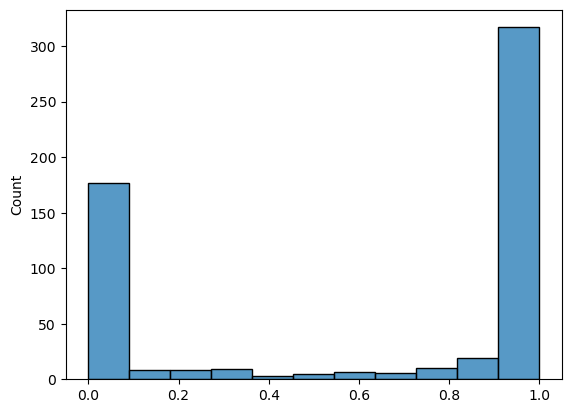

In [32]:
y_hat_proba = clf.predict_proba(X)[:,1]
import seaborn as sns
sns.histplot(y_hat_proba);

In [33]:
y_pred = clf.predict(X)

## Matrice de confusion et scores (d'évaluation)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9578207381370826

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[197,  15],
       [  9, 348]], dtype=int64)

In [37]:
y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

In [38]:
confusion_matrix(y, y_pred_03)

array([[193,  19],
       [  5, 352]], dtype=int64)

In [39]:
confusion_matrix(y, y_pred_07)

array([[206,   6],
       [ 17, 340]], dtype=int64)

In [44]:
from sklearn.metrics import precision_score, recall_score
print('Pour un seuil à 0.5:\n')
print('accuracy_score = ', accuracy_score(y, y_pred))
print('precision_score = ',precision_score(y, y_pred))
print('recall_score = ',recall_score(y, y_pred))

Pour un seuil à 0.5:

accuracy_score =  0.9578207381370826
precision_score =  0.9586776859504132
recall_score =  0.9747899159663865


In [45]:
print('Pour un seuil à 0.3:\n')
print('accuracy_score = ', accuracy_score(y, y_pred_03))
print('precision_score = ',precision_score(y, y_pred_03))
print('recall_score = ',recall_score(y, y_pred_03))

Pour un seuil à 0.3:

accuracy_score =  0.9578207381370826
precision_score =  0.9487870619946092
recall_score =  0.9859943977591037


In [46]:
print('Pour un seuil à 0.7:\n')
print('accuracy_score = ', accuracy_score(y, y_pred_07))
print('precision_score = ',precision_score(y, y_pred_07))
print('recall_score = ',recall_score(y, y_pred_07))

Pour un seuil à 0.7:

accuracy_score =  0.9595782073813708
precision_score =  0.9826589595375722
recall_score =  0.9523809523809523


## Receiver Operating Characteristic

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred)

0.9520175994926273

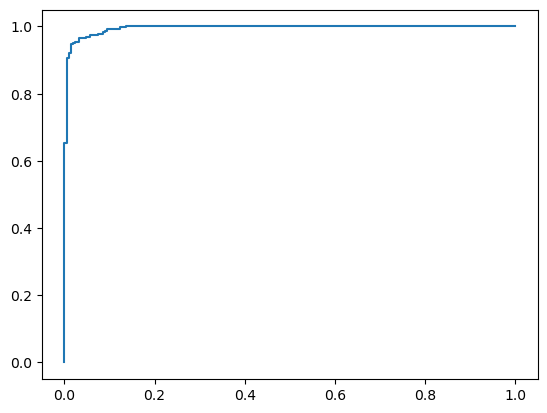

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_hat_proba)

plt.plot(fpr, tpr)

## Iris classification

In [52]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [61]:
clf = LogisticRegression(random_state=42,max_iter=10000).fit(X, y)
y_pred = clf.predict(X)
clf.predict_proba([X[13, :]])

array([[9.91871110e-01, 8.12888590e-03, 3.88931677e-09]])

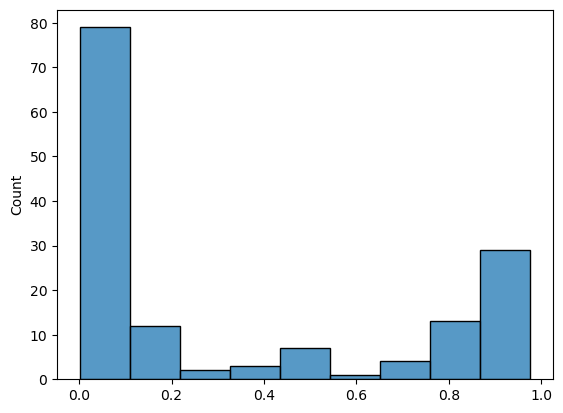

In [60]:
y_hat_proba = clf.predict_proba(X)[:,1]


sns.histplot(y_hat_proba);

In [62]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [68]:
print('Pour un seuil à 0.5:\n')
print('accuracy_score = ', accuracy_score(y, y_pred))
print('precision_score = ',precision_score(y, y_pred,average ='macro'))
print('recall_score = ',recall_score(y, y_pred,average ='macro'))

Pour un seuil à 0.5:

accuracy_score =  0.9733333333333334
precision_score =  0.9738247863247862
recall_score =  0.9733333333333333
